## Project:  Using Python for understanding a function of two variables.

The aim of this project is to show how computational tools may be used to help understand functions of two variables. 

We will define a function, illustrate it using surface and contour plots, and locate every stationary point of the function, identifying the nature of each such point. Finally we'll look at maxima and minima subject to a constraint.

The function we will be working with is $$ f(x,y)= (x^3+y^3-xy) \cdot e^{-x^2-y^2}. $$

We start by defining our function in Python and making some initial plots to help see how the function is varying with $x$ and $y$.

&nbsp;  

By using `matplotlib`, we make both a surface plot and a contour plot of $f(x,y)$


In [204]:
#import the relevant packages

import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

# define the variables we will be using
x = sym.symbols('x')
y = sym.symbols('y')

#construct the given function f(x,y)
f = ((x**3) + (y**3) - (x*y)) * (sym.exp((-(x**2))-(y**2)))
f

(x**3 - x*y + y**3)*exp(-x**2 - y**2)

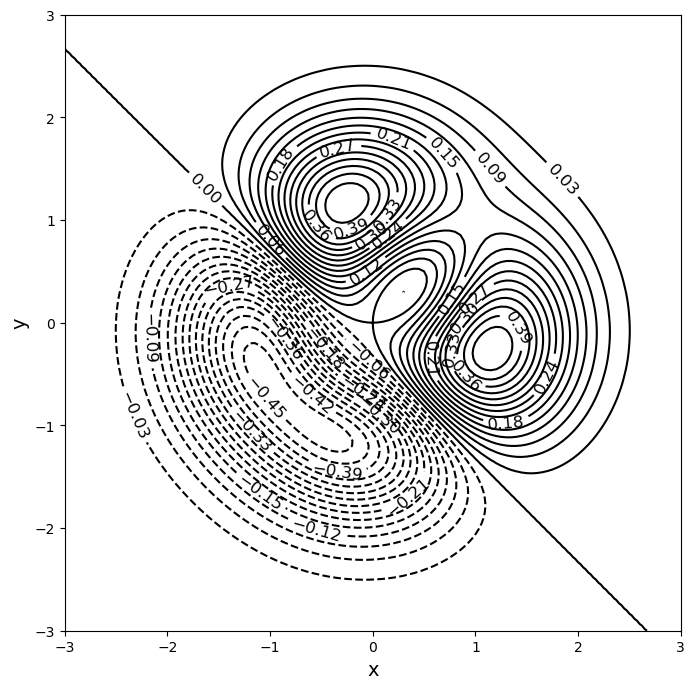

In [207]:
# creating surface and contour plots

f2 = sym.lambdify((x,y),f,"numpy") # convert expression to numpy

# creating a contour plot

%matplotlib inline
xp = np.arange(-3.0,3.05,0.05)
yp = np.arange(-3.0,3.05,0.05)
#now make a grid of points
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,f2(X,Y),levels=30,colors='k')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);
ax.clabel(B,fontsize=12)
ax.set_aspect(1)



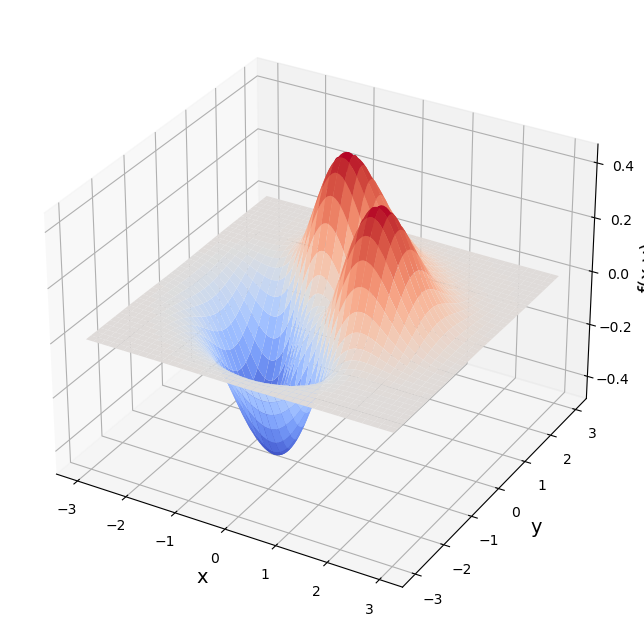

In [208]:
# create a surface plot


xp = np.arange(-3.0,3.05,0.05)
yp = np.arange(-3.0,3.05,0.05)
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
f2 = sym.lambdify((x,y),f,"numpy")
ax.plot_surface(X,Y,f2(X,Y),cmap='coolwarm')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)
ax.set_zlabel('f(x,y)',fontsize=14);

*Sympy* helps us find the two first partial derivatives of $f$, $\frac{\partial f}{\partial x}$ and $\frac{\partial f}{\partial y}$, with the outcomes stored in variables called `fx` and `fy`.

Stationary points are locations where the following system of equations is satisfied:

$$\frac{\partial f}{\partial x}=0, \ \  \frac{\partial f}{\partial y}=0.$$ 
  

Using the `nonlinsolve` command, we try and solve the system of equations $\{f_x=0, f_y=0\}$, storing any solutions obtained in a list called `SOLS1`. For this instance we keep only real valued solutions to 4 sf, but remove any complex solutions

In [210]:
# finding my first two partial derivatives

fx = sym.diff(f,x)
fy = sym.diff(f,y)

In [211]:
#findings my list of solutions

all_solutions = sym.nonlinsolve([fx,fy],[x,y]) # finding all solutions
SOLS1 = []
real = False
for i in all_solutions: #for each solution, confirm both the x and y coordinate are real
    if i[0].is_real == True and i[1].is_real == True: 
        round = [i[0].evalf(4), i[1].evalf(4)] # round to 4 s.f
        SOLS1.append(round)
SOLS1

[[0, 0],
 [1.000, 1.000],
 [0.3090, 0.3090],
 [-0.8090, -0.8090],
 [-0.4864, -1.059],
 [-1.059, -0.4864],
 [1.163, -0.2591],
 [-0.2591, 1.163]]

We will take the stationary points identified in the previous section and use algebraic techniques to determine the nature of each point.

&nbsp;  

Using *SymPy*, we demonstrate that the mixed partial derivatives $\frac{\partial^2 f}{\partial x \partial y}$ and $\frac{\partial^2 f}{\partial y \partial x}$ are, as expected, equal for this function.

We then find the discriminant of $f(x,y)$ and store this as `Delta`. 

Using the discriminant (`Delta`) and other appropriate algebraic derivative tests, we classify each stationary point from the previous section as a maximum, minimum, or a saddle point. 

Results are stored in a list called `SOLS1_TYPES` where each entry has format `[x,y,'type']` (e.g. `[5,-7,'saddle']`).    


In [215]:
fxy = sym.diff(f,x,y)
fyx = sym.diff(f,y,x)
fxx = sym.diff(f,x,x)
fyy = sym.diff(f,y,y)
fxy-fyx #as subtracting both mixed derivatives from each other is 0, the mixed derivatives are equal

0

In [216]:
#find an expression for the descriminant
Delta = (fxx)*(fyy) - (fxy)**2

In [217]:
#classify each stationary point

SOLS1_TYPES =[]
for i in SOLS1: #for each real solution we substitute the values of x and y into the descriminant
    t = Delta.subs(x,i[0]).subs(y,i[1])
    if t<0: #if the value of delta is less than 0, we have a saddle point
        SOLS1_TYPES.append([i[0],i[1],'saddle'])
    elif t>0: # if the value is greater than 0, we need to do more tests
        if fxx.subs(x,i[0]).subs(y,i[1]) <0: #if the second derivative of x is less than 0, we have a max
            SOLS1_TYPES.append([i[0],i[1],'Maximum'])
        elif fxx.subs(x,i[0]).subs(y,i[1]) >0: #if the second derivative of x is greater than 0, we have a min
            SOLS1_TYPES.append([i[0],i[1],'Minimum'])
    else: # if delta =0, the test is inconclusive and needs higher order taylor series
        SOLS1_TYPES.append([i[0],i[1],'Inconclusive'])
SOLS1_TYPES
        
        

    

[[0, 0, 'saddle'],
 [1.000, 1.000, 'saddle'],
 [0.3090, 0.3090, 'Minimum'],
 [-0.8090, -0.8090, 'saddle'],
 [-0.4864, -1.059, 'Minimum'],
 [-1.059, -0.4864, 'Minimum'],
 [1.163, -0.2591, 'Maximum'],
 [-0.2591, 1.163, 'Maximum']]

The discriminant test used in the previous section is derived from the Taylor series representation of a function about a stationary point $(x_0,y_0)$. We can therefore use plots to show how a 2D Taylor series taken about a point at $(x_0,y_0)$ **locally** approximates the function near to that point. 

Recall that the second degree Taylor approximation to $f(x,y)$ about $(x_0,y_0)$ is given by

$$f(x,y) = f(x_0,y_0) + f_x(x_0,y_0)(x-x_0) + f_y(x_0,y_0)(y-y_0) + \frac{1}{2} \left( f_{xx}(x_0,y_0)(x-x_0)^2 + 2 f_{xy}(x_0,y_0)(x-x_0)(y-y_0) + f_{yy}(y-y_0)^2 \right).$$


&nbsp;    &nbsp;  

First, we take the two stationary points that are closest to the origin. For each stationary point we make a contour plot of $f(x,y)$ on the square region of width $0.2$ centered at the stationary point.

We then find the second degree Taylor approximation of $f(x,y)$ at each of your two points, calling these quadratics `Q1` and `Q2`, with `Q1` being the one corresponding to the point closest to the origin.

For visualiation, we create contour plots of $f(x,y)$ and `Q1` on the same image, on a range $x \in [x_0-\delta, x_0+\delta]$, $y \in [y_0-\delta, y_0+\delta]$ for $\delta = 0.5, 0.25$, and $0.05$ (so making three plots in total). The process is repeated for the second stationary point. 



In [220]:
#the two stationary points closest two the origin
minpos = SOLS1_TYPES[0] , SOLS1_TYPES[2]
minpos

([0, 0, 'saddle'], [0.3090, 0.3090, 'Minimum'])

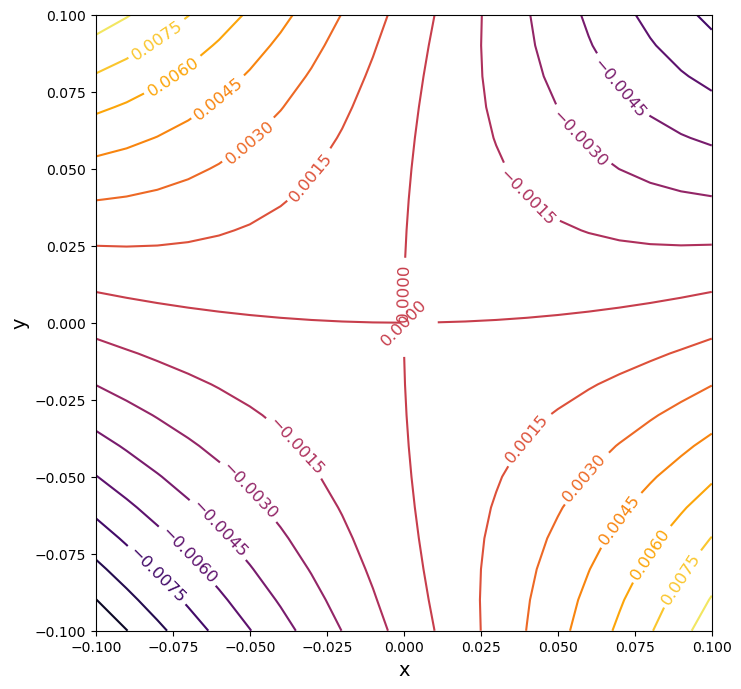

In [221]:
#contour plot of the point (0,0)


point1x = minpos[0][0]
point1y = minpos[0][1]
xp = np.arange(float(point1x)-0.1,float(point1x)+0.11,0.01) #accomodating for python ranges
yp = np.arange(float(point1y)-0.1,float(point1y)+0.11, 0.01)
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,f2(X,Y),levels=20,cmap = 'inferno') #is this an appropriate contour plot
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);
ax.clabel(B,fontsize=12)
ax.set_aspect(1)

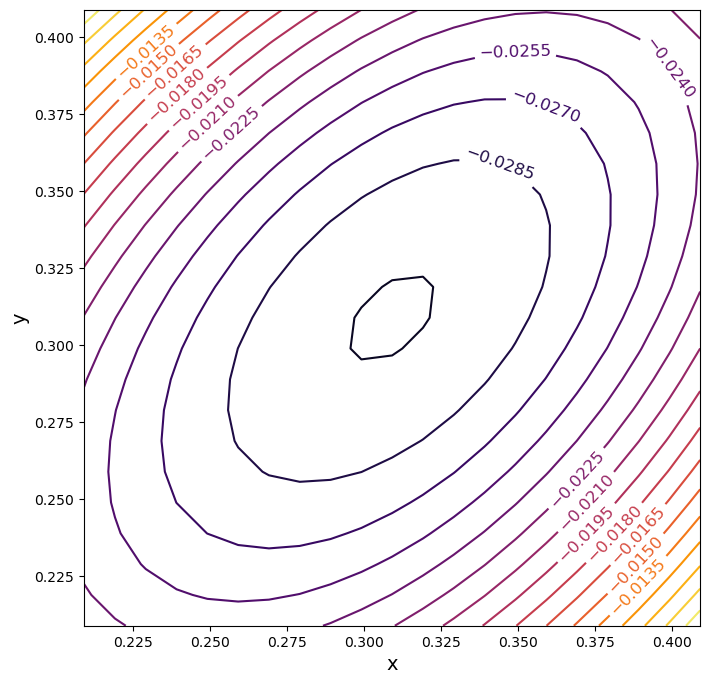

In [ ]:
#contour plot for 0.3090, 0.3090

point2x = minpos[1][0]
point2y = minpos[1][1]
xp = np.arange(float(point2x)-0.1,float(point2x)+0.11,0.01) 
yp = np.arange(float(point2y)-0.1,float(point2y)+0.11, 0.01)
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,f2(X,Y),levels=20,cmap = 'inferno') #is this an appropriate contour plot
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);
ax.clabel(B,fontsize=12)
ax.set_aspect(1)

In [223]:
#taylor series for point cloest to origin
T1 = f.subs({x: point1x, y: point1y})
T2 = ( (x-point1x) * (fx.subs({x: point1x, y: point1y})) )+ (y-point1y) * (fy.subs({x: point1x, y: point1y}))
T3 = ((x - point1x)**2) * (fxx.subs({x: point1x, y: point1y})) + (2 *(x-point1x)*(y-point1y)* (fxy.subs({x: point1x, y: point1y}))) + ((y - point1y)**2) * (fyy.subs({x: point1x, y: point1y})) 
Q1 = T1+T2+0.5*T3


#Taylor series for point second cloest to origin
T1 = f.subs({x: point2x, y: point2y})
T2 = ( (x-point2x) * (fx.subs({x: point2x, y: point2y})) )+ (y-point2y) * (fy.subs({x: point2x, y: point2y}))
T3 = ((x - point2x)**2) * (fxx.subs({x: point2x, y: point2y})) + (2 *(x-point2x)*(y-point2y)* (fxy.subs({x: point2x, y: point2y}))) + ((y - point2y)**2) * (fyy.subs({x: point2x, y: point2y})) 
Q2 = T1+T2+0.5*T3

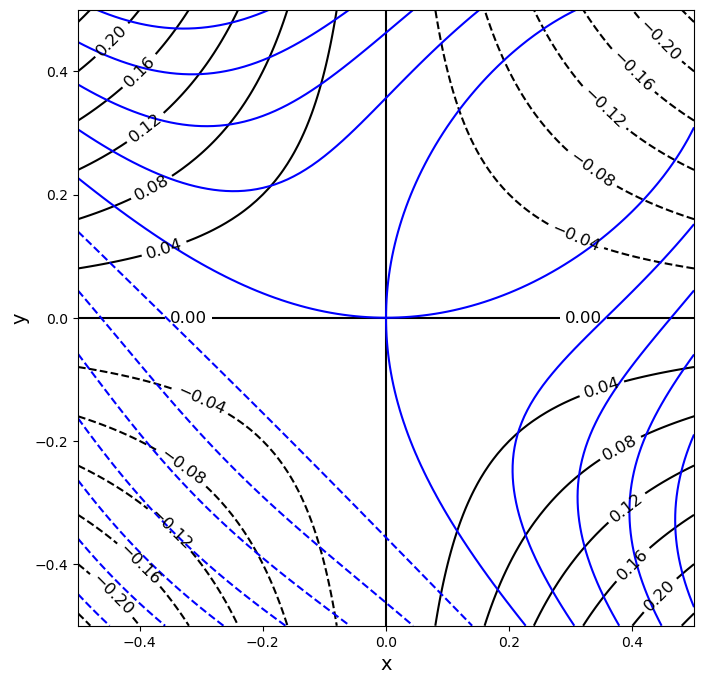

In [224]:
#point 1
#+-0.5
Q1_contour = sym.lambdify((x,y),Q1,"numpy")
xp = np.arange(float(point1x)-0.5,float(point1x)+0.51,0.01)
yp = np.arange(float(point1y)-0.5,float(point1y)+0.51, 0.01)
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,Q1_contour(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,f2(X,Y),levels=12,colors='b')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);
ax.clabel(B,fontsize=12)
ax.set_aspect(1)


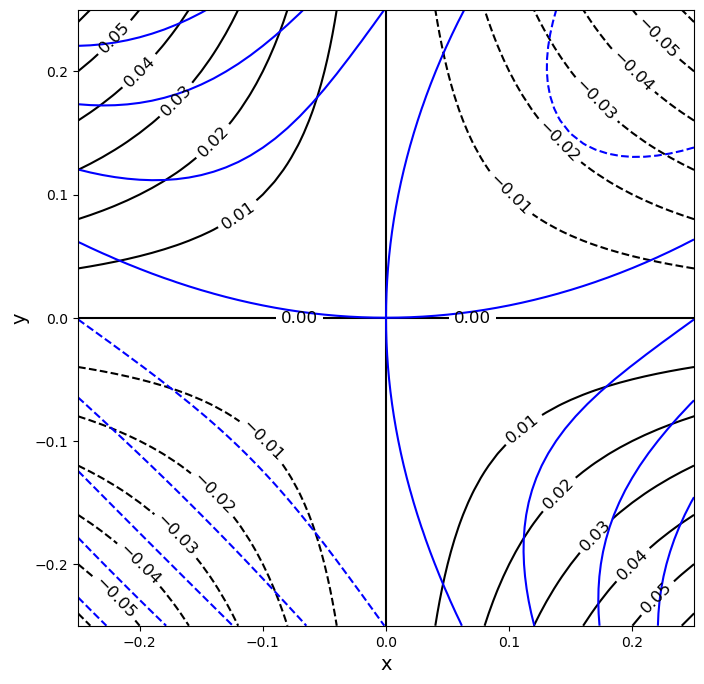

In [225]:
#+-0.25
xp = np.arange(float(point1x)-0.25,float(point1x)+0.26,0.01)
yp = np.arange(float(point1y)-0.25,float(point1y)+0.26, 0.01)

X,Y = np.meshgrid(xp,yp)

fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)

B = ax.contour(X,Y,Q1_contour(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,f2(X,Y),levels=12,colors='b')

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);


ax.clabel(B,fontsize=12)
ax.set_aspect(1)

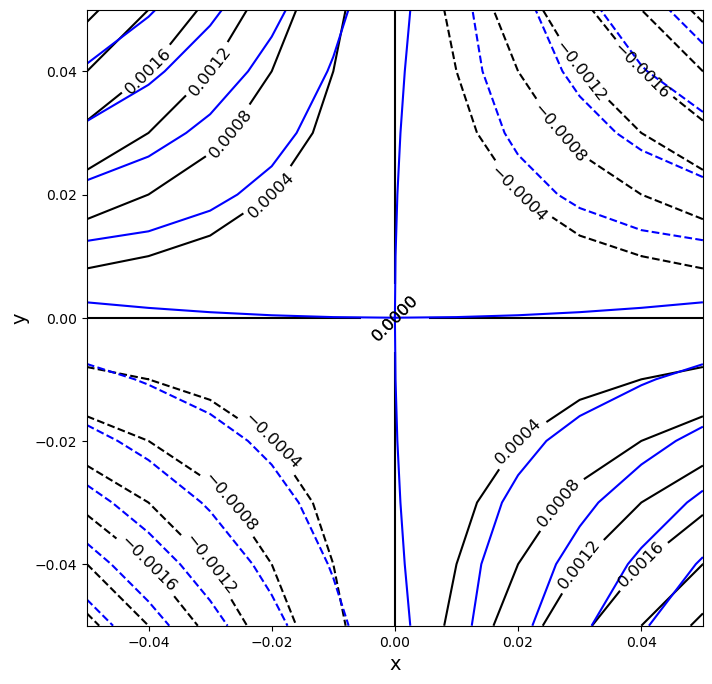

In [226]:
#+-0.05
xp = np.arange(float(point1x)-0.05,float(point1x)+0.06,0.01)
yp = np.arange(float(point1y)-0.05,float(point1y)+0.06, 0.01)

X,Y = np.meshgrid(xp,yp)

fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)

B = ax.contour(X,Y,Q1_contour(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,f2(X,Y),levels=12,colors='b')

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);


ax.clabel(B,fontsize=12)
ax.set_aspect(1)

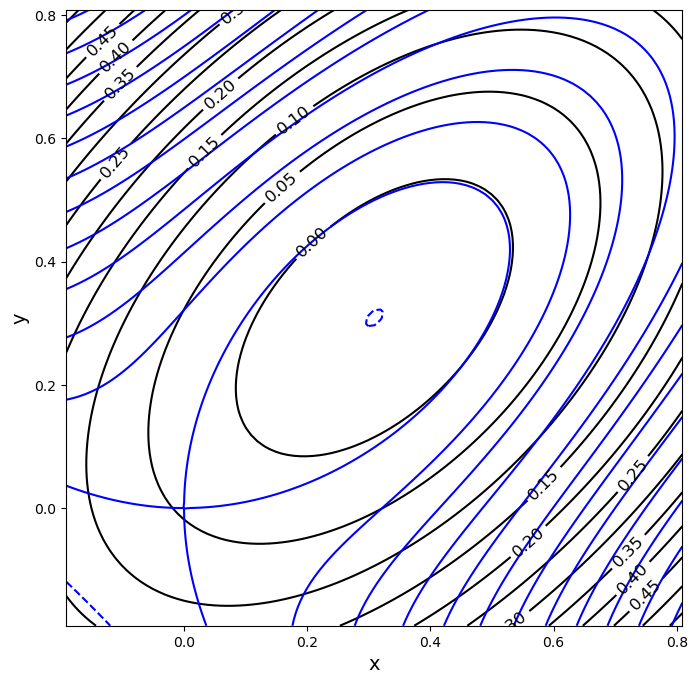

In [227]:
#point 2
#+-0.5
Q2_contour = sym.lambdify((x,y),Q2,"numpy")
xp = np.arange(float(point2x)-0.5,float(point2x)+0.51,0.01)
yp = np.arange(float(point2y)-0.5,float(point2y)+0.51, 0.01)
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,Q2_contour(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,f2(X,Y),levels=12,colors='b')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);
ax.clabel(B,fontsize=12)
ax.set_aspect(1)

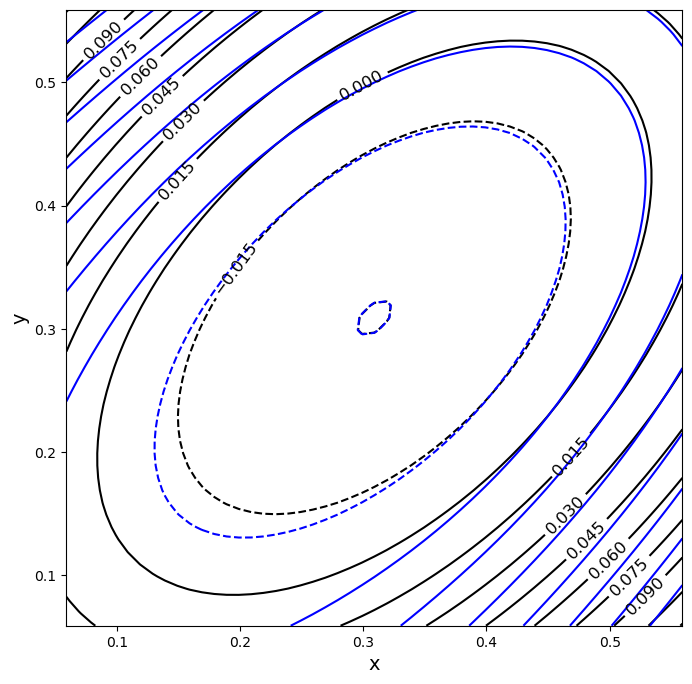

In [228]:
#+-0.25
xp = np.arange(float(point2x)-0.25,float(point2x)+0.26,0.01)
yp = np.arange(float(point2y)-0.25,float(point2y)+0.26, 0.01)

X,Y = np.meshgrid(xp,yp)

fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)

B = ax.contour(X,Y,Q2_contour(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,f2(X,Y),levels=12,colors='b')

ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);


ax.clabel(B,fontsize=12)
ax.set_aspect(1)

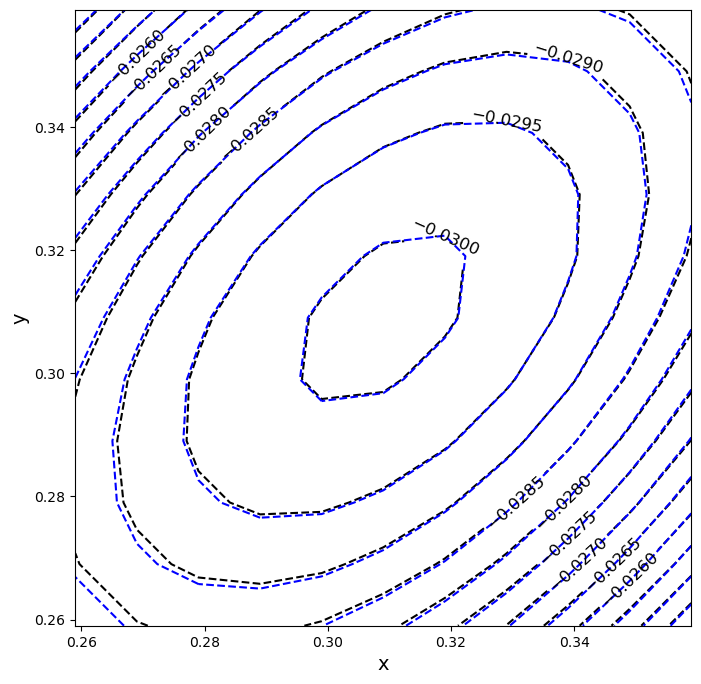

In [229]:
#+-0.05
xp = np.arange(float(point2x)-0.05,float(point2x)+0.06,0.01)
yp = np.arange(float(point2y)-0.05,float(point2y)+0.06, 0.01)
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,Q2_contour(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,f2(X,Y),levels=12,colors='b')
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14);
ax.clabel(B,fontsize=12)
ax.set_aspect(1)

the tighter we set our range to the point we are expanding from, the more accurate the Taylor expansions
this is what we would expect, as the closer to the point we are expanding from, the more accurate the expansions should be
Additionally, we can see that on the contours closer to the expansion point, the estimation is more accurate

We summarise our above findings in a single plot, making a plot that shows the function, marks each stationary point and indicates the nature of each point.   

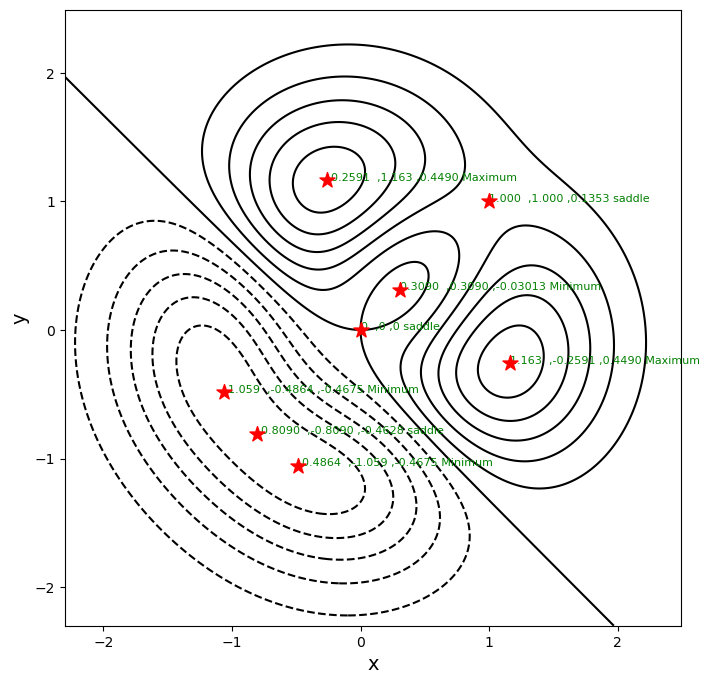

In [232]:
f2 = sym.lambdify((x,y),f,"numpy") #converting the function to a numpy function to graph

xp = np.arange(-2.3,2.5,0.01)
yp = np.arange(-2.3,2.5, 0.01)

X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
ax.contour(X,Y,f2(X,Y),levels=12,colors='k') #is this an appropriate contour plot
ax.clabel(B,fontsize=12)
ax.set_aspect(1)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)

for i in SOLS1_TYPES:
    ax.text(i[0],i[1],(str(i[0]) +'  ,'+ str(i[1])+' ,'+str(f.subs(x,i[0]).subs(y,i[1])) + ' ' +    i[2]),color='g',fontsize=8)
    ax.scatter(i[0],i[1], marker="*",color='r',s=130,zorder=3)

#from the diagram we can clearly see the stationary points 

Still considering the function $f(x,y)$ given above, we aim to identify all maxima and minima of $f$ subject to a given constraint.

First, we use Python to locate all maxima and minima of $f$ subject to the constraint 

$$x^2+y^2=2.$$ 

Results are stored in a list called `SOLS2_TYPES` where each entry has format `[x,y,'type']` (e.g. `[5,-7,'minimum']` if the location $(5,-7)$ was a minimum along the constraint.

If results are given numerically, they are accurate to at least $4$ significant figures.

Now, we make a contour plot of $f(x,y)$ and overlay the constraint. Markers are added indicating the locations of each of the extrema of $f(x,y)$ along the constraint, and whether each one is a maximum or minimum point.

In [234]:
#the funtion to maximise is f, already defined

g = x**2 +y**2 -2 # the constraint

l = sym.symbols('l') # lagrangian multiplier

F = f-l*g #combine equation and contraint

Fx = sym.diff(F,x) #
Fy = sym.diff(F,y) # find the partial derivatives
Fl = sym.diff(F,l) #

#as is done with the method of lagrangian multipliers. Find values of x and y that satisfy
#all second derivative equations

all_solutions = sym.nonlinsolve([Fx,Fy,Fl],[x,y,l]) 

#as we have used nonlinsolve we remove the complex solutions

SOLS2 = []
real = False
for i in all_solutions: #for each solution, confirm both the x and y coordinate are real, if so, round to 4 SF
    if i[0].is_real == True and i[1].is_real == True: 
        round = [i[0].evalf(4), i[1].evalf(4)]
        SOLS2.append(round)

#when we solved our equations, the funtion returned duplicates of some x,y coordinates
#this is because two different values of lambda gave the same x,y values
#we remove the duplicate solutions

non_dupes_xy = []
for i in SOLS2:
    if i not in non_dupes_xy:
        non_dupes_xy.append(i)

# we find our corresponding values of f, for our x,y values
        

z_values = []
for i in non_dupes_xy:
    z_val = f.subs(x,i[0]).subs(y,i[1])
    z_values.append(z_val)


to classify our points, we can see how the points behave in the XZ and YZ plane. We plot their values of X and Z 
and Y and Z respectively.

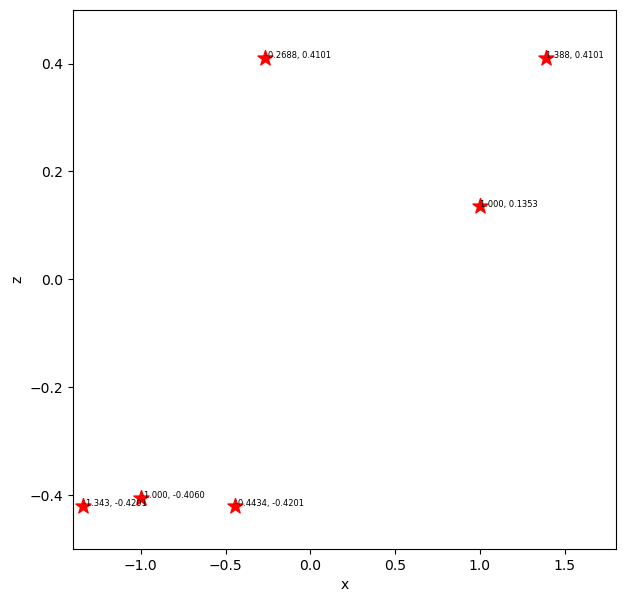

In [236]:
#points in the XZ plane
fig = plt.figure(1,figsize=(7,7))
axz = fig.add_subplot(111)

axz.set_xlabel('x')
axz.set_ylabel('z')

axz.axis([-1.4, 1.8, -0.5, 0.5])

for i in range (0,len(non_dupes_xy)):
    axz.text(non_dupes_xy[i][0],z_values[i], str(non_dupes_xy[i][0]) + ', ' + str(z_values[i]), fontsize=6,)
    axz.scatter(non_dupes_xy[i][0],z_values[i],marker="*",color='r',s=130,zorder=2)






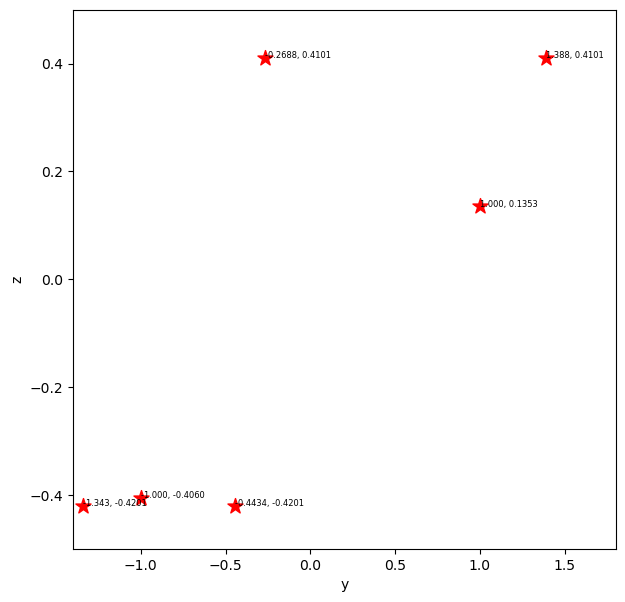

In [237]:
#points in the YZ plane
fig = plt.figure(1,figsize=(7,7))
ayz = fig.add_subplot(111)

ayz.set_xlabel('y')
ayz.set_ylabel('z')

ayz.axis([-1.4, 1.8, -0.5, 0.5])


for i in range (0,len(non_dupes_xy)):
    ayz.text(non_dupes_xy[i][0],z_values[i], str(non_dupes_xy[i][0]) + ', ' + str(z_values[i]), fontsize=6,)
    ayz.scatter(non_dupes_xy[i][0],z_values[i],marker="*",color='r',s=130,zorder=2)

if we were to match up all of our crosses, we would see  very clearly that the function has clear peaks and troughs.
these points indicate very obvious minimas and maximas. The peaks being maximas, and the troughs minimas
as the same values of Z correspond to minimas and maximas in both planes. We can safely conclude which points are 
minimum and maximum values

Additionally, from our contour plot for part B, we can see the same pattern, which is helpful to classify our points on the
far left and right of our graph.

If we imagine walking along the contour plot, we move from one maximum, to a minimum, and back again. That is another way
we can clearly identify the maximums and minimums

In [238]:
#we can assign our minimums and maximums based on the geometric interpretation

SOLS2_TYPES=[]
            
for i in range (0, len(non_dupes_xy)):
    if i == 0 or i == 3 or i == 5:
        SOLS2_TYPES.append([non_dupes_xy[i][0],non_dupes_xy[i][1],'Minimum'])
    if i == 1 or i== 2 or i == 4:
        SOLS2_TYPES.append([non_dupes_xy[i][0],non_dupes_xy[i][1],'Maximum'])
SOLS2_TYPES



[[1.000, 1.000, 'Minimum'],
 [-1.000, -1.000, 'Maximum'],
 [-0.2688, 1.388, 'Maximum'],
 [-1.343, -0.4434, 'Minimum'],
 [1.388, -0.2688, 'Maximum'],
 [-0.4434, -1.343, 'Minimum']]

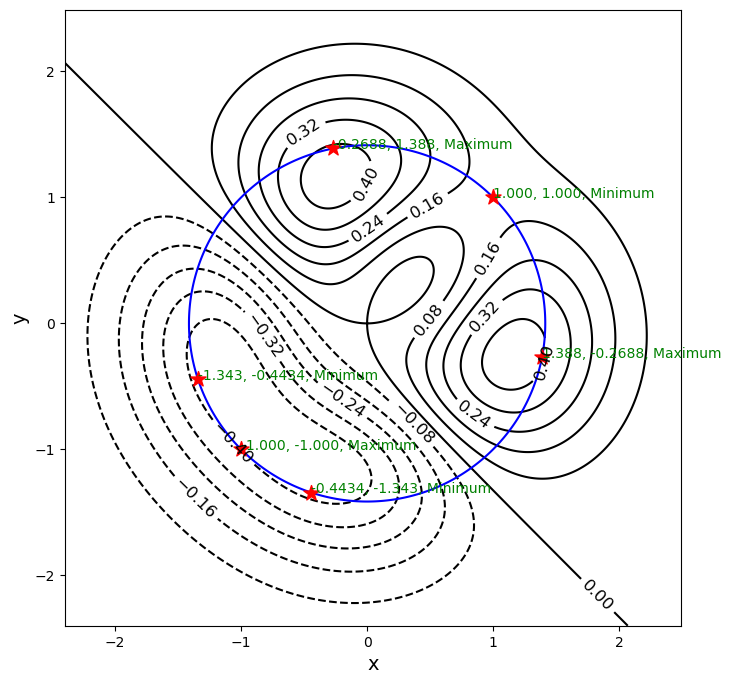

In [241]:
#graphing our constraint and function indicating maximums and minimums
xp = np.arange(-2.4,2.5,0.01)
yp = np.arange(-2.4,2.5, 0.01)
g_contour =sym.lambdify((x,y),g,"numpy")
X,Y = np.meshgrid(xp,yp)
fig = plt.figure(1,figsize=(8,8))
ax = fig.add_subplot(111)
B = ax.contour(X,Y,f2(X,Y),levels=12,colors='k') #is this an appropriate contour plot
A = ax.contour(X,Y,g_contour(X,Y),[0],colors='b')
ax.clabel(B,fontsize=12)
ax.set_aspect(1)
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)

for i in SOLS2_TYPES:
    ax.text(i[0],i[1],str(i[0]) + ', ' + str(i[1]) + ', ' + i[2],fontsize=10, color ='g')
    ax.scatter(i[0],i[1],marker="*",color='r',s=130,zorder=2)